In [1]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data_Saisonbrot"
training_features_path = f"{subdirectory}/training_features.pkl"
#validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
#validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
#validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
#validation_labels = pd.read_pickle(validation_labels_path)
#test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
#print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
#print("Loaded Validation labels dimensions:", validation_labels.shape)
#print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (292, 24)
Loaded Test features dimensions: (56, 24)

Loaded Training labels dimensions: (292, 1)

First few rows of loaded training features:
      Temp_Cold_current  Temp_Mild_current  Cloud_Clear_current  \
9042                  0                  1                    0   
9043                  0                  1                    0   
9044                  0                  1                    0   
9045                  0                  1                    0   
9046                  0                  1                    0   

      Cloud_Cloudy_current  Weather_Moderate_current  Samstag_current  \
9042                     0                         0                0   
9043                     1                         0                0   
9044                     0                         0                1   
9045                     1                         0                0   
9046                     1                         0 

In [2]:
#Defining the Neural Network
#Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam # --> Optimierungsalgorithmus
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping Callback Definition
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Überwachung der Validierungsverlust
#     patience=4,         # Anzahl der Epochen ohne Verbesserung
#     restore_best_weights=True  # Stellt das Modell mit den besten Gewichten wieder her
# )

#Sequential ermöglicht das Erstellen eines Modells mit einer Schicht nach der abnderen
#Dense sind die Schichten, die Eingaben mit Gewichten und einer Aktivierungsfunktion kombinieren
model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  #Dropout(0.1),  
  BatchNormalization(),
  Dense(40, activation='relu', kernel_regularizer=l2(0.1)),# --> 1. Schicht mit 10 Neuronen mit ReLU Aktivierungsfunktion (rectified linear unit), um Nichtlinearität in das Modell reinzubringen
  #Dropout(0.1),
  Dense(20, activation='relu', kernel_regularizer=l2(0.1)),
  Dense(1) # keine Aktivierugnsfunktion --> Regression (um kontinuierliche Were als Output zu erhalten)
])

#model.summary()

2025-01-06 18:31:42.858378: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-06 18:31:42.859507: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-06 18:31:42.862534: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-06 18:31:42.871136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736188302.887143   59385 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736188302.89

In [3]:
# Compiling and Training the model with mean squared Error (MSE) as loss function and adam optimizer
model.compile(loss="huber", optimizer=Adam(learning_rate=0.004, beta_1=0.9, beta_2=0.9), metrics = ['mae']) # Mean Absolute Error zur Überwachung


history = model.fit(training_features, training_labels, epochs=26, 
                    batch_size = 64, 
                    verbose =1,
                    #validation_data=(validation_features, validation_labels),
                    #callbacks=[early_stopping] 
                    )

# Infos zum Output:
# 235/235 bedeutet, dass Datensatz in 235 Batches aufgeteilt wurde und alle Batches für diese Epoche verarbeitet wurden
#1s 2ms/step: Zeit, die für die gesamte Epoche benötigt wurde (1 Sekunde) und durchschnittlich 2 Millisekunden pro Schritt
#loss: 63840.3867: Der Trainingsverlust (Loss) nach dieser Epoche. Ein hoher Wert bedeutet, dass das Modell noch weit davon entfernt ist, optimale Vorhersagen zu treffen.
#val_loss: 51443.0977: Der Validierungsverlust (Loss) für diese Epoche. Das ist der Verlust auf den Validierungsdaten, die nicht für das Training verwendet werden, sondern zur Überprüfung der Modellleistung dienen

Epoch 1/26


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 71.0610 - mae: 66.0105
Epoch 2/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.4042 - mae: 66.0622 
Epoch 3/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.4329 - mae: 66.6804 
Epoch 4/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 67.0414 - mae: 63.7458 
Epoch 5/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.0108 - mae: 63.0300 
Epoch 6/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.4917 - mae: 60.6810 
Epoch 7/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.6052 - mae: 59.8308 
Epoch 8/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.0423 - mae: 55.1774 
Epoch 9/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.6335 - mae: 51.5621 
Epoch 10/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.1803 - mae: 46.8025 
Epoch 11/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.0361 - mae: 43.2681 
Epoch 12/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.1629 - mae: 36.9455 
Epoch 13/26
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [4]:
# Saving the trained Model
model.save("python_model_Saisonbrot.h5")

In [5]:
# Making Predictions and Evaluating the Model
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
#validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
#print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


MAPE on the Training Data: 31.83%


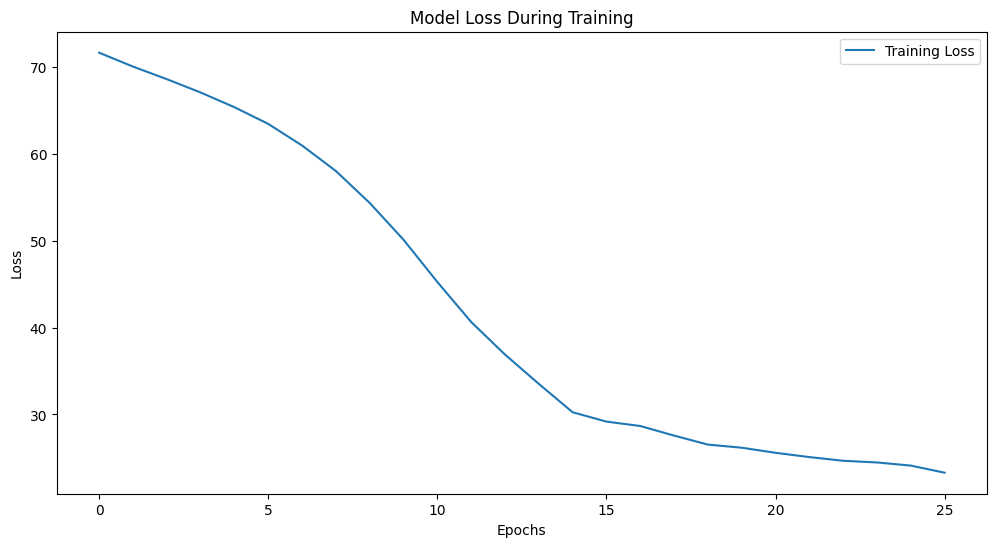

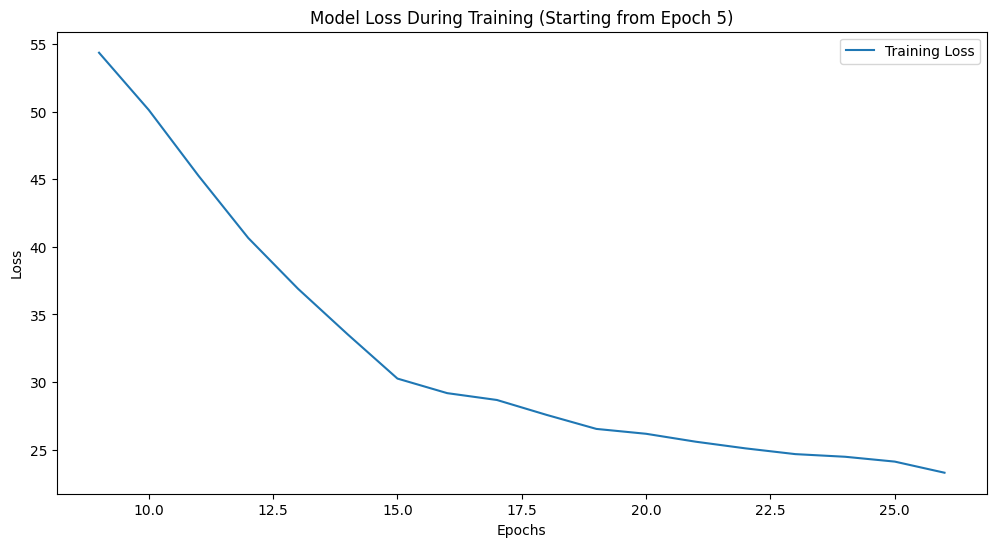

In [6]:
# Plotting Training History
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training History (ab der 5. Epoche)
import matplotlib.pyplot as plt

# Schneide die Verlaufsdaten ab der 5. Epoche
epochs_to_plot = range(9, len(history.history['loss']) + 1)
training_loss = history.history['loss'][8:]
#validation_loss = history.history['val_loss'][8:]

plt.figure(figsize=(12, 6))
plt.plot(epochs_to_plot, training_loss, label='Training Loss')
#plt.plot(epochs_to_plot, validation_loss, label='Validation Loss')
plt.title('Model Loss During Training (Starting from Epoch 5)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


***VORHERSAGE TESTZEITRAUM***

In [7]:
test_predictions = model.predict(test_features)
#print("Predictions for test data:", test_predictions[:5])  # Display first 5 predictions
# Größe des Arrays anzeigen
print("Größe des Arrays (shape):", test_predictions.shape)
test_predictions = pd.DataFrame(test_predictions)
test_predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Größe des Arrays (shape): (56, 1)


,0
0,30.784967
1,29.259726
2,46.081211
3,37.980408
4,28.358461
5,39.604496
6,31.338026
7,23.402882
8,39.604496
9,27.895914


In [8]:
data_test = pd.read_csv("/workspaces/bakery_sales_prediction/0_DataPreparation/00_data/data_with_lag/Testdaten_with_lag.csv")
data_test = data_test[data_test["Warengruppe_6"] == 1]
data_test

,id,Datum,Warengruppe_1,Warengruppe_2,Warengruppe_3,Warengruppe_4,Warengruppe_5,Warengruppe_6,Temp_Very_Cold_current,Temp_Very_Cold_prev,...,zwischen_den_jahren_next,Number_of_ships_scaled_current,Number_of_ships_scaled_prev,Number_of_ships_scaled_next,Cloud_ok_current,Cloud_ok_prev,Cloud_ok_next,Wind_ok_current,Wind_ok_prev,Wind_ok_next
1774,1811016,2018-11-01,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.2,0.0,1,0.0,0.0,1,1.0,1.0
1775,1811026,2018-11-02,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,0,1.0,1.0,1,1.0,1.0
1776,1811036,2018-11-03,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1.0,1.0
1777,1811046,2018-11-04,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.0,0.2,0,1.0,0.0,1,1.0,1.0
1778,1811056,2018-11-05,0,0,0,0,0,1,0,0.0,...,0.0,0.2,0.0,0.2,0,0.0,0.0,1,1.0,1.0
1779,1811066,2018-11-06,0,0,0,0,0,1,0,0.0,...,0.0,0.2,0.2,0.4,0,0.0,1.0,1,1.0,1.0
1780,1811076,2018-11-07,0,0,0,0,0,1,0,0.0,...,0.0,0.4,0.2,1.0,1,0.0,0.0,1,1.0,1.0
1781,1811086,2018-11-08,0,0,0,0,0,1,0,0.0,...,0.0,1.0,0.4,0.2,0,1.0,0.0,1,1.0,1.0
1782,1811096,2018-11-09,0,0,0,0,0,1,0,0.0,...,0.0,0.2,1.0,0.0,0,0.0,0.0,1,1.0,1.0
1783,1811106,2018-11-10,0,0,0,0,0,1,0,0.0,...,0.0,0.0,0.2,0.0,0,0.0,0.0,1,1.0,1.0


In [9]:
# Erstelle Ziel csv Datei

predictions_df = pd.DataFrame({
    'id': data_test['id'].values,
    'Umsatz': test_predictions[0].values
}).reset_index(drop=True)

# Save to a CSV file
#output_csv_path = "/workspaces/bakery_sales_prediction/3_Model/02_Franz/V3_lag/Umsatzvorhersage_Saisonbrot_Hochladeformat.csv"

predictions_df.to_csv('Saisonbrot_Umsatzvorhersage.csv', index=False)
print(f"CSV Datei erstellt")

CSV Datei erstellt
